In [1]:
!pip install amplpy

   ---------------------------------------- 2.5/2.5 MB 20.2 MB/s eta 0:00:00


In [1]:
from amplpy import AMPL
ampl = AMPL() # instantiate AMPL object

# AIDM Lab 2 Solution

In [2]:
from amplpy import AMPL

# Initialize AMPL environment
ampl = AMPL()

ampl.set_option("solver", "cbc")

# Define the sets, parameters, and variables
ampl.eval("""
# Decision variables
var bananas >= 0 integer;
var apples >= 0 integer;

# Objective: Maximize the total number of fruits
maximize TotalFruits: bananas + apples;

# Constraints
subject to BananaLimit: bananas <= 4;
subject to AppleLimit: apples <= 9;
subject to RatioConstraint1: bananas <= 2 * apples;
subject to RatioConstraint2: apples <= 2 * bananas;
""")

# Solve the optimization problem
ampl.solve()

# Get the results
bananas = ampl.getVariable("bananas").value()
apples = ampl.getVariable("apples").value()
total_fruits = ampl.getObjective("TotalFruits").value()

print(f"Optimal number of bananas: {bananas}")
print(f"Optimal number of apples: {apples}")
print(f"Total fruits packed: {total_fruits}")


cbc 2.10.10:cbc 2.10.10: optimal solution; objective 12
0 simplex iterations
Optimal number of bananas: 4.0
Optimal number of apples: 8.0
Total fruits packed: 12.0


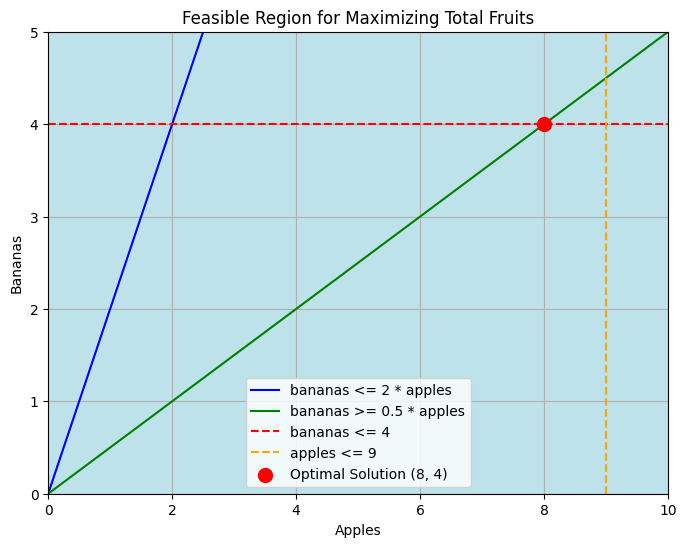

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of apples and bananas
apples = np.linspace(0, 10, 400)
bananas = np.linspace(0, 5, 400)

# Define constraints
banana_limit = 4
apple_limit = 9
ratio_constraint1 = 2 * apples
ratio_constraint2 = 0.5 * apples

# Create a grid for the feasible region
A, B = np.meshgrid(apples, bananas)
feasible_region = (
    (B <= banana_limit) &
    (A <= apple_limit) &
    (B <= 2 * A) &
    (B >= 0.5 * A)
)

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.contourf(A, B, feasible_region, levels=1, colors=['#a1d6e2'], alpha=0.7)
plt.plot(apples, ratio_constraint1, label="bananas <= 2 * apples", color="blue")
plt.plot(apples, ratio_constraint2, label="bananas >= 0.5 * apples", color="green")
plt.axhline(y=banana_limit, color="red", linestyle="--", label="bananas <= 4")
plt.axvline(x=apple_limit, color="orange", linestyle="--", label="apples <= 9")


# Optimal solution

optimal_apples = 8

optimal_bananas = 4

plt.scatter(optimal_apples, optimal_bananas, color="red", s=100, label="Optimal Solution (8, 4)", zorder=5)

# Labeling the plot
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xlabel("Apples")
plt.ylabel("Bananas")
plt.title("Feasible Region for Maximizing Total Fruits")
plt.legend()
plt.grid(True)
plt.show()


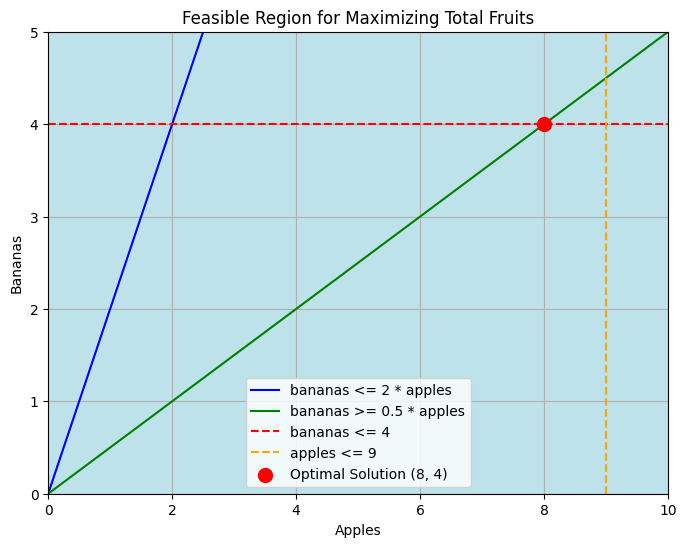

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of apples and bananas
apples = np.linspace(0, 10, 400)
bananas = np.linspace(0, 5, 400)

# Define constraints
banana_limit = 4
apple_limit = 9
ratio_constraint1 = 2 * apples  # bananas <= 2 * apples
ratio_constraint2 = 0.5 * apples  # bananas >= 0.5 * apples

# Create a grid for the feasible region
A, B = np.meshgrid(apples, bananas)

# Feasible region is where all constraints are satisfied
feasible_region = (
    (B <= banana_limit) &  # bananas <= 4
    (A <= apple_limit) &   # apples <= 9
    (B <= 2 * A) &         # bananas <= 2 * apples
    (B >= 0.5 * A)         # bananas >= 0.5 * apples
)

# Plot the feasible region
plt.figure(figsize=(8, 6))

# Color the feasible area
plt.contourf(A, B, feasible_region, levels=1, colors=['#a1d6e2'], alpha=0.7)

# Plot the constraint lines
plt.plot(apples, ratio_constraint1, label="bananas <= 2 * apples", color="blue")
plt.plot(apples, ratio_constraint2, label="bananas >= 0.5 * apples", color="green")
plt.axhline(y=banana_limit, color="red", linestyle="--", label="bananas <= 4")
plt.axvline(x=apple_limit, color="orange", linestyle="--", label="apples <= 9")

# Optimal solution (from your model)
optimal_apples = 8
optimal_bananas = 4

# Mark the optimal solution point
plt.scatter(optimal_apples, optimal_bananas, color="red", s=100, label="Optimal Solution (8, 4)", zorder=5)

# Labeling the plot
plt.xlim(0, 10)
plt.ylim(0, 5)
plt.xlabel("Apples")
plt.ylabel("Bananas")
plt.title("Feasible Region for Maximizing Total Fruits")
plt.legend()
plt.grid(True)
plt.show()
